**INF2178 - Experiments With Data**

**Technical Assignment 3**

**Professor Shion Gua**

**Student Name - Fatima Ashfaq**

Student ID - 1010784732

Date Created - 10 March 2024

Date Modified - 22 March 2024

URL Link to Report/Narrative:

https://docs.google.com/document/d/1LlznJfGPTyAIO10oO91MH9ac84FeICbwhZ7QzbKpWzw/edit?usp=sharing

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [2]:
# Load Required Libraries
import pandas as pd
from scipy import stats as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy

from plotly import express, graph_objects, subplots, io
io.templates.default = "plotly"

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
# Load The Dataset
df = pd.read_csv('/drive/MyDrive/INF2178/INF2178_A3_data.csv')
df.head(10)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,150.0,3
6,32.49,20.82,26.211,38.52,29.09,29.612,42000.0,42.0,2
7,33.30,26.85,27.072,36.72,32.22,33.730,70000.0,70.0,3
8,65.92,47.36,33.514,84.61,59.89,42.359,100000.0,100.0,3
9,34.20,22.27,28.096,39.87,27.44,32.374,78000.0,78.0,3


In this dataset, the ***dependent variables*** are:
- Reading Scores (Fall and Spring)
- Math Scores (Fall and Spring)
- General Knowledge Scores (Fall and Spring)

The ***independent variable*** is:
- Income Group (one of three levels; 1,2, and 3)

[the income group is the factor being manipulated/controlled to observe its impact on the student's fall and spring scores.]


The **covariate variable** is:
- General Knowledge Scores (Fall and Spring)


In [4]:
# State the levels of treatment - categorical variable
df.incomegroup = pd.Categorical(df.incomegroup, ordered = True, categories = [1,2,3])

In [5]:
# Verify the Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   fallreadingscore             11933 non-null  float64 
 1   fallmathscore                11933 non-null  float64 
 2   fallgeneralknowledgescore    11933 non-null  float64 
 3   springreadingscore           11933 non-null  float64 
 4   springmathscore              11933 non-null  float64 
 5   springgeneralknowledgescore  11933 non-null  float64 
 6   totalhouseholdincome         11933 non-null  float64 
 7   incomeinthousands            11933 non-null  float64 
 8   incomegroup                  11933 non-null  category
dtypes: category(1), float64(8)
memory usage: 757.7 KB


**Research Question**
- Is the Income Group Level a predictor for kindergarten students' academic performance (maths and reading scores) in Fall and Spring terms?
- Is there a significant difference in kindergarten students' reading and math scores between Fall and Spring terms across different income groups [using general knowledge as a baseline]?

**Hypotheses**
- **Null Hypothesis (H$0$):** There is no significant difference in kindergarten students' reading and math scores between Fall and Spring terms across different income groups after correcting for the covariate variable, 'General Knowledge Scores'.
- **Alternative Hypothesis (H$1$):** There is a significant difference in kindergarten students' reading and math scores between Fall and Spring terms across different income groups

# Exploratory Data Analysis (EDA)

Non-Graphical EDA

In [6]:
# Number of Observations/Frequencies for each Income Group Level
df.incomegroup.value_counts()

1    4729
2    3726
3    3478
Name: incomegroup, dtype: int64

In [7]:
# Computing Summary Statistics of the Dependent Variable given each Income Group Level
print("Summary Descriptive Statistics for Fall Reading Scores:")
print()
df.groupby('incomegroup').fallreadingscore.describe()

Summary Descriptive Statistics for Fall Reading Scores:



,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,32.786798,8.092492,21.01,27.1000,31.660,36.05,118.29
2,3726.0,36.292517,9.994213,22.19,30.2725,34.530,40.00,138.51
3,3478.0,39.898493,12.289081,23.01,32.7800,37.575,44.23,133.56


In [8]:
print("Summary Descriptive Statistics for Fall Math Scores:")
print()
df.groupby('incomegroup').fallmathscore.describe()

Summary Descriptive Statistics for Fall Math Scores:



,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,23.924504,7.642412,10.51,18.6100,22.790,27.5700,86.33
2,3726.0,27.568468,8.541161,11.59,21.5200,26.140,31.7800,83.42
3,3478.0,31.012720,9.930977,10.90,24.3725,29.085,35.6675,115.65


In [9]:
print("Summary Descriptive Statistics for Spring Reading Scores:")
print()
df.groupby('incomegroup').springreadingscore.describe()

Summary Descriptive Statistics for Spring Reading Scores:



,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,43.665077,12.004821,22.35,36.1000,41.970,48.5300,142.49
2,3726.0,48.009450,13.505020,23.93,39.8725,46.065,52.1675,142.49
3,3478.0,52.206880,16.450153,24.54,42.7800,48.740,56.2375,156.85


In [10]:
print("Summary Descriptive Statistics for Spring Math Scores:")
print()
df.groupby('incomegroup').springmathscore.describe()

Summary Descriptive Statistics for Spring Math Scores:



,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,33.883051,10.734653,11.90,26.4100,32.270,40.1000,105.06
2,3726.0,38.464691,11.359349,13.14,30.3925,37.035,44.6975,110.33
3,3478.0,42.411898,12.605759,12.70,33.8450,41.030,48.4600,113.80


In [11]:
# Computing Summary Statistics for General Knowledge Score -covariate
print("Summary Descriptive Statistics for Fall General Knowledge Score:")
print()
df.groupby("incomegroup").fallgeneralknowledgescore.describe()

Summary Descriptive Statistics for Fall General Knowledge Score:



,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,19.947683,6.717169,6.985,14.8400,19.2980,24.64300,43.508
2,3726.0,23.887885,6.870052,7.115,18.8100,23.8690,28.59275,46.120
3,3478.0,26.451851,7.101515,7.504,21.6065,26.5055,31.36700,47.691


In [12]:
print("Summary Descriptive Statistics for Spring General Knowledge Score:")
print()
df.groupby("incomegroup").springgeneralknowledgescore.describe()

Summary Descriptive Statistics for Spring General Knowledge Score:



,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,25.069492,7.248229,8.124,19.70800,25.065,30.15500,45.581
2,3726.0,29.143605,6.965300,7.858,24.49775,29.476,34.12075,48.055
3,3478.0,31.567718,6.928347,9.513,27.12050,32.082,36.63375,48.345


Graphical EDA

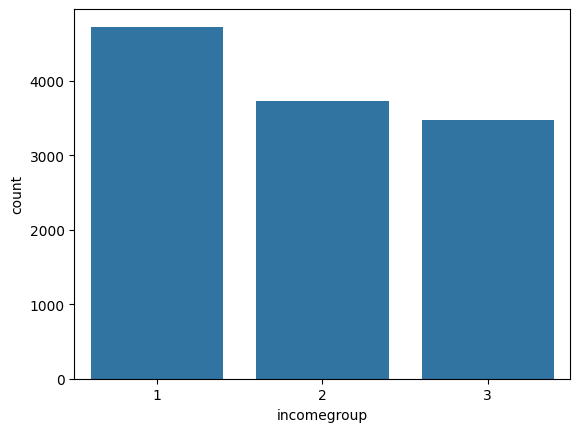

In [51]:
# Countplot of Income Groups
sns.countplot(x="incomegroup", data=df)
plt.show()

In [13]:
# Visualisation 1 - Box Plot
# Fall Reading Scores per Income Group
express.box(
    df,
    y = 'fallreadingscore',
    color = 'incomegroup',
    title = 'Fall Reading Scores per Income Group',
    labels = {
        'fallreadingscore' : 'Reading Score'
    }
)


In [14]:
# Visualisation 2 - Box Plot
# Fall Math Scores per Income Group
express.box(
    df,
    y = 'fallmathscore',
    color = 'incomegroup',
    title = 'Fall Math Scores per Income Group',
    labels = {
        'fallmathscore' : 'Math Score'
    }
)


In [15]:
# Visualisation 3 - Box Plot
# Spring Reading Scores per Income Group
express.box(
    df,
    y = 'springreadingscore',
    color = 'incomegroup',
    title = 'Spring Reading Scores per Income Group',
    labels = {
        'springreadingscore' : 'Reading Score'
    }
)


In [16]:
# Visualisation 4 - Box Plot
# Spring Math Scores per Income Group
express.box(
    df,
    y = 'springmathscore',
    color = 'incomegroup',
    title = 'Spring Math Scores per Income Group',
    labels = {
        'springmathscore' : 'Math Score'
    }
)


In [17]:
# Visualisation 5 - Box plot (covariate variable)
# Fall General Knowledge Scores per Income Group
express.box(
    df,
    y = 'fallgeneralknowledgescore',
    color = 'incomegroup',
    title = 'Fall General Knowledge Scores per Income Group',
    labels = {
        'fallgeneralknowledgescore': 'General Knowledge Score'
    }
)


In [18]:
# Visualisation 6 - Box plot (covariate variable)
# Spring General Knowledge Scores per Income Group
express.box(
    df,
    y = 'springgeneralknowledgescore',
    color = 'incomegroup',
    title = 'Spring General Knowledge Scores per Income Group',
    labels = {
     'springgeneralknowledgescore':'General Knowledge Score'
    }
)


<ipython-input-19-cfbbf4a77559>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



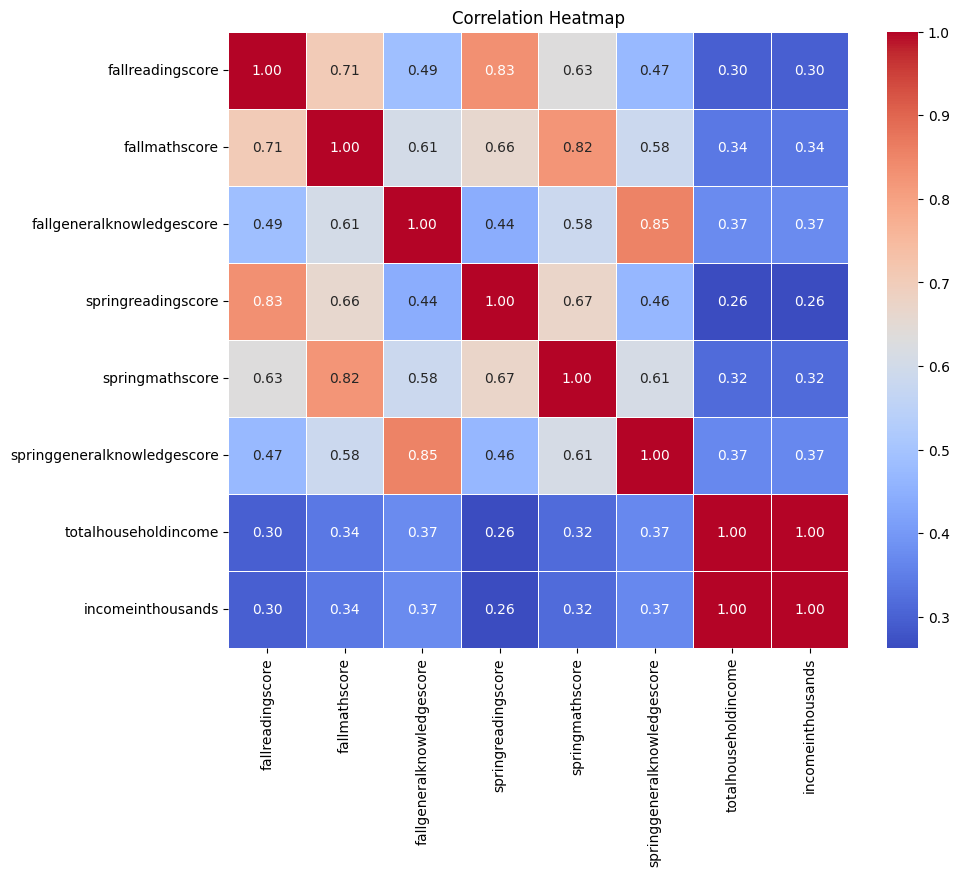

In [19]:
# Visualisation 7 - Correlation Matrix / Heatmap
# Visualise correlation between different variables in the df dataset and help understand the relationships between them

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Visualisation 8 - Scatter Plot
# Visualise the correlation between the covariate and the independent variable per income group level
express.scatter(
    df,
    x = 'fallgeneralknowledgescore',
    y = 'fallreadingscore',
    color = 'incomegroup',
    trendline = 'ols',
    title = 'Reading Score given General Knowledge Score per Income Group',
    labels = {
        'fallgeneralknowledgescore': 'General Knowledge Score (Fall)',
        'fallreadingscore': 'Reading Score (Fall)',
        'incomegroup': 'Income Group'
    }
)


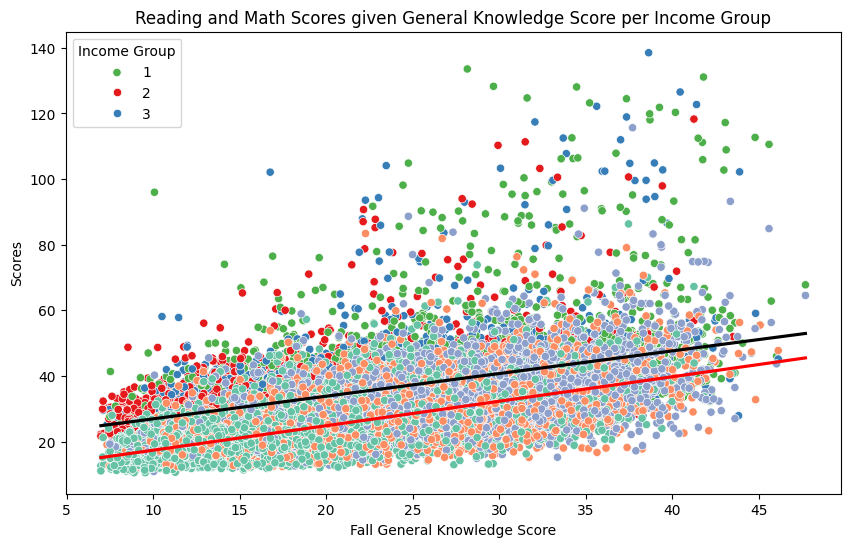

In [50]:
# Visualisation 9 - Scatterplot with Trendline for each Income Group (Fall)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fallgeneralknowledgescore', y='fallreadingscore', hue='incomegroup', palette='Set1')
sns.scatterplot(data=df, x='fallgeneralknowledgescore', y='fallmathscore', hue='incomegroup', palette='Set2')
sns.regplot(data=df, x='fallgeneralknowledgescore', y='fallreadingscore', scatter=False, ci=None, line_kws={'color': 'black'})
sns.regplot(data=df, x='fallgeneralknowledgescore', y='fallmathscore', scatter=False, ci=None, line_kws={'color': 'red'})
plt.title('Reading and Math Scores given General Knowledge Score per Income Group')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Scores')
plt.legend(title='Income Group', labels=['1', '2', '3'])
plt.show()

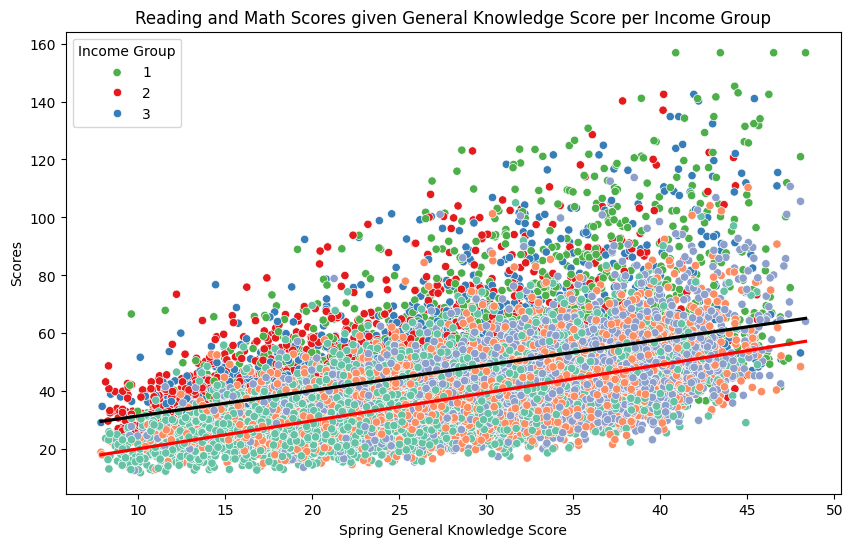

In [22]:
# Visualisation 10 - Scatterplot with Trendline for each Income Group (Spring)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='springgeneralknowledgescore', y='springreadingscore', hue='incomegroup', palette='Set1')
sns.scatterplot(data=df, x='springgeneralknowledgescore', y='springmathscore', hue='incomegroup', palette='Set2')
sns.regplot(data=df, x='springgeneralknowledgescore', y='springreadingscore', scatter=False, ci=None, line_kws={'color': 'black'})
sns.regplot(data=df, x='springgeneralknowledgescore', y='springmathscore', scatter=False, ci=None, line_kws={'color': 'red'})
plt.title('Reading and Math Scores given General Knowledge Score per Income Group')
plt.xlabel('Spring General Knowledge Score')
plt.ylabel('Scores')
plt.legend(title='Income Group', labels=['1', '2', '3'])
plt.show()

# Analysis Of Covariance (ANCOVA)

## **Assumptions Checking**
- **Assumption 1** - Linearity: there is a linear relation between the covariate independent variables and the continuous numerical dependent variable
- **Assumption 2** - Homogeneity Of Regression: there is no interaction between the covariate and the independent categorical variable.
- **Assumption 3** - Normality Of Residuals: residuals should follow a normal distribition.
- **Assumption 4** - Homogeneity of Variances.

**Assumption 1 - Linear Relation**

Fall Academic Performance


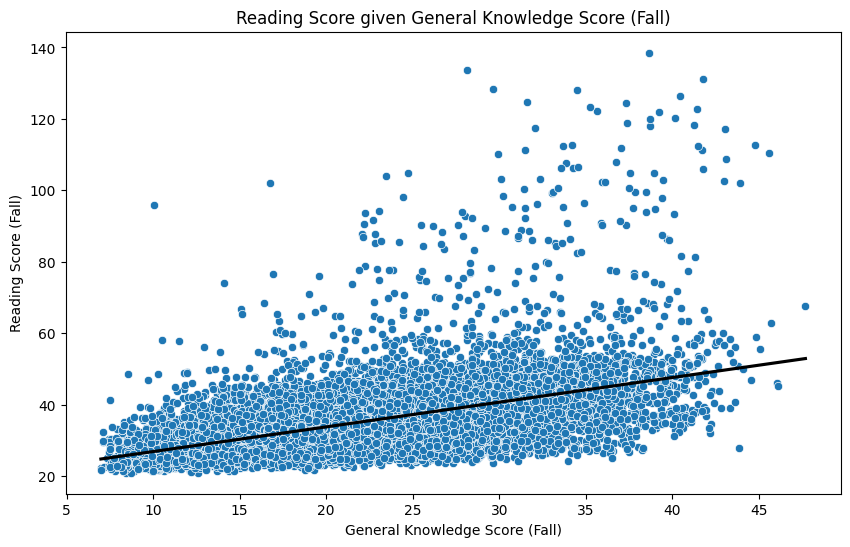

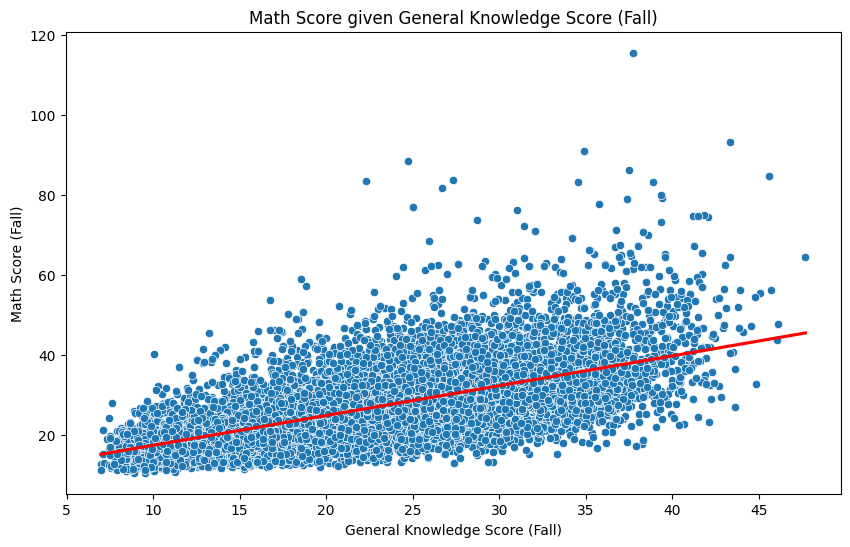

In [23]:
# Assumption 1 - Linearity
# Checked visually through the construction and inspection of a scatter plot of fall and spring reading and math scores given fall and spring general knowledge score
print ("Fall Academic Performance")

#Fall reading scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fallgeneralknowledgescore', y='fallreadingscore')
sns.regplot(data=df, x='fallgeneralknowledgescore', y='fallreadingscore', scatter=False, ci=None, line_kws={'color': 'black'})
plt.title('Reading Score given General Knowledge Score (Fall)')
plt.xlabel('General Knowledge Score (Fall)')
plt.ylabel('Reading Score (Fall)')
plt.show()

#Fall maths scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fallgeneralknowledgescore', y='fallmathscore')
sns.regplot(data=df, x='fallgeneralknowledgescore', y='fallmathscore', scatter=False, ci=None, line_kws={'color': 'red'})
plt.title('Math Score given General Knowledge Score (Fall)')
plt.xlabel('General Knowledge Score (Fall)')
plt.ylabel('Math Score (Fall)')
plt.show()

Spring Academic Performance


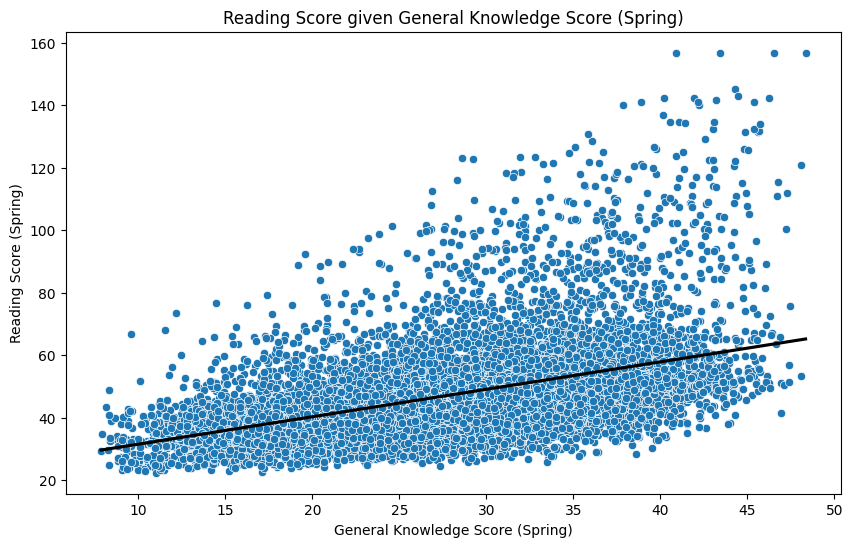

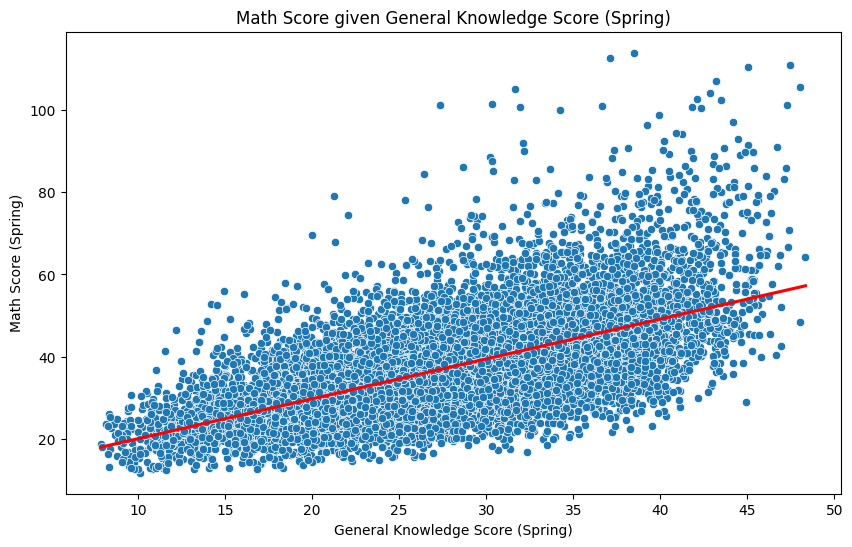

In [24]:
print ("Spring Academic Performance")

#Spring reading scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='springgeneralknowledgescore', y='springreadingscore')
sns.regplot(data=df, x='springgeneralknowledgescore', y='springreadingscore', scatter=False, ci=None, line_kws={'color': 'black'})
plt.title('Reading Score given General Knowledge Score (Spring)')
plt.xlabel('General Knowledge Score (Spring)')
plt.ylabel('Reading Score (Spring)')
plt.show()

#Spring maths scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='springgeneralknowledgescore', y='springmathscore')
sns.regplot(data=df, x='springgeneralknowledgescore', y='springmathscore', scatter=False, ci=None, line_kws={'color': 'red'})
plt.title('Math Score given General Knowledge Score (Spring)')
plt.xlabel('General Knowledge Score (Spring)')
plt.ylabel('Math Score (Spring)')
plt.show()

In [25]:
# Assumption 1 - Linearity
# Fitting a linear regression model
# Fall Reading Scores
linear_model_fallreading = ols('fallreadingscore ~ fallgeneralknowledgescore', data=df).fit()
linear_model_fallreading.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       fallreadingscore   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     3723.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:25:47   Log-Likelihood:                -43340.
No. Observations:               11933   AIC:                         8.668e+04
Df Residuals:                   11931   BIC:                         8.670e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    20.0229      0.274     73.022      0.000      19.485      20.560
fallgeneralknowledgescore     0.6905      0.011     61.012      0.000       0.668       0.713
==============================================================================
Omnibus:                     8423.064   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           193595.114
Skew:                           3.122   Prob(JB):                         0.00
Kurtosis:                      21.718   Cond. No.                         79.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Assumption 1 - Linearity
# Fitting a linear regression model
# Fall Math Scores
linear_model_fallmath = ols('fallmathscore ~ fallgeneralknowledgescore', data=df).fit()
linear_model_fallmath.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fallmathscore   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     6896.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:25:47   Log-Likelihood:                -40588.
No. Observations:               11933   AIC:                         8.118e+04
Df Residuals:                   11931   BIC:                         8.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     9.9096      0.218     45.512      0.000       9.483      10.336
fallgeneralknowledgescore     0.7462      0.009     83.045      0.000       0.729       0.764
==============================================================================
Omnibus:                     3440.938   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17084.246
Skew:                           1.309   Prob(JB):                         0.00
Kurtosis:                       8.244   Cond. No.                         79.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Assumption 1 - Linearity
# Fitting a linear regression model
# Spring Reading Scores
linear_model_springreading = ols('springreadingscore ~ springgeneralknowledgescore', data=df).fit()
linear_model_springreading.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     springreadingscore   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     3287.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:25:47   Log-Likelihood:                -47247.
No. Observations:               11933   AIC:                         9.450e+04
Df Residuals:                   11931   BIC:                         9.451e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      22.7009      0.448     50.662      0.000      21.823      23.579
springgeneralknowledgescore     0.8787      0.015     57.329      0.000       0.849       0.909
==============================================================================
Omnibus:                     5964.153   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46907.389
Skew:                           2.274   Prob(JB):                         0.00
Kurtosis:                      11.583   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Assumption 1 - Linearity
# Fitting a linear regression model
# Spring Math Scores
linear_model_springmath = ols('springmathscore ~ springgeneralknowledgescore', data=df).fit()
linear_model_springmath.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        springmathscore   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     7045.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:25:47   Log-Likelihood:                -43843.
No. Observations:               11933   AIC:                         8.769e+04
Df Residuals:                   11931   BIC:                         8.770e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      10.4913      0.337     31.144      0.000       9.831      11.152
springgeneralknowledgescore     0.9672      0.012     83.933      0.000       0.945       0.990
==============================================================================
Omnibus:                     2540.259   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7717.738
Skew:                           1.098   Prob(JB):                         0.00
Kurtosis:                       6.271   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Assumption 2 - Homogeneity of Regression Slopes**

In [29]:
# Assumption 2 - Homogeneity of regression slopes (parrallel regression slopes)
# Fall Reading Score
interaction_model_fallreading = ols('fallreadingscore ~ fallgeneralknowledgescore * incomegroup', data= df).fit()
anova_lm(interaction_model_fallreading, type = 3)

,df,sum_sq,mean_sq,F,PR(>F)
incomegroup,2.0,101978.658155,50989.329077,620.585977,4.014876e-257
fallgeneralknowledgescore,1.0,225245.650280,225245.650280,2741.442070,0.000000e+00
fallgeneralknowledgescore:incomegroup,2.0,1593.933092,796.966546,9.699799,6.178071e-05
Residual,11927.0,979960.474049,82.163199,NaN,NaN


In [30]:
# Assumption 2 - Homogeneity of regression slopes (parallel regression slopes)
# Fall Math Score
interaction_model_fallmath = ols('fallmathscore ~ fallgeneralknowledgescore * incomegroup', data= df).fit()
anova_lm(interaction_model_fallreading, type = 3)

,df,sum_sq,mean_sq,F,PR(>F)
incomegroup,2.0,101978.658155,50989.329077,620.585977,4.014876e-257
fallgeneralknowledgescore,1.0,225245.650280,225245.650280,2741.442070,0.000000e+00
fallgeneralknowledgescore:incomegroup,2.0,1593.933092,796.966546,9.699799,6.178071e-05
Residual,11927.0,979960.474049,82.163199,NaN,NaN


In [31]:
# Assumption 2 - Homogeneity of regression slopes (parrallel regression slopes)
# Spring Reading Score
interaction_model_springreading = ols('springreadingscore ~ springgeneralknowledgescore * incomegroup', data= df).fit()
anova_lm(interaction_model_springreading, type = 3)

,df,sum_sq,mean_sq,F,PR(>F)
incomegroup,2.0,1.475673e+05,73783.672906,463.075992,2.065001e-194
springgeneralknowledgescore,1.0,4.000620e+05,400061.995883,2510.841469,0.000000e+00
springgeneralknowledgescore:incomegroup,2.0,1.231253e+03,615.626573,3.863753,2.101536e-02
Residual,11927.0,1.900375e+06,159.333833,NaN,NaN


In [32]:
# Assumption 2 - Homogeneity of regression slopes (parrallel regression slopes)
# Spring Math Score
interaction_model_springmath = ols('springmathscore ~ springgeneralknowledgescore * incomegroup', data= df).fit()
anova_lm(interaction_model_springmath, type = 3)

,df,sum_sq,mean_sq,F,PR(>F)
incomegroup,2.0,1.481765e+05,74088.242248,823.953680,0.000000
springgeneralknowledgescore,1.0,5.043363e+05,504336.296614,5608.848784,0.000000
springgeneralknowledgescore:incomegroup,2.0,1.200487e+03,600.243474,6.675456,0.001266
Residual,11927.0,1.072452e+06,89.917970,NaN,NaN


**Assumption 3 - Normality of Residuals**

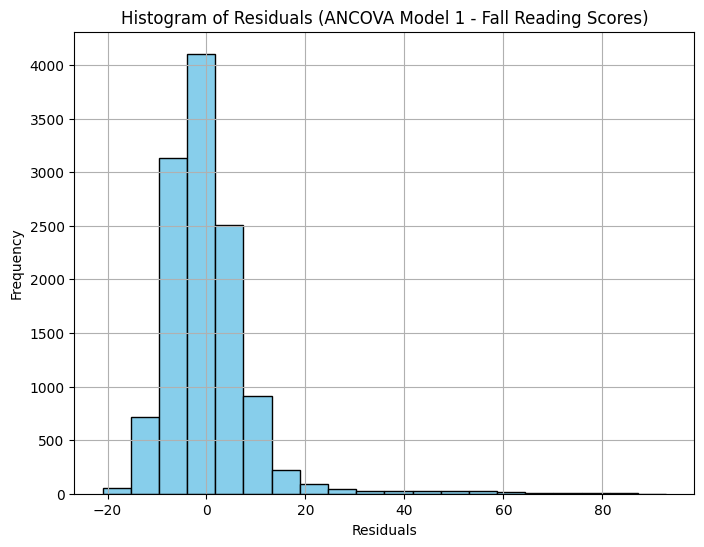

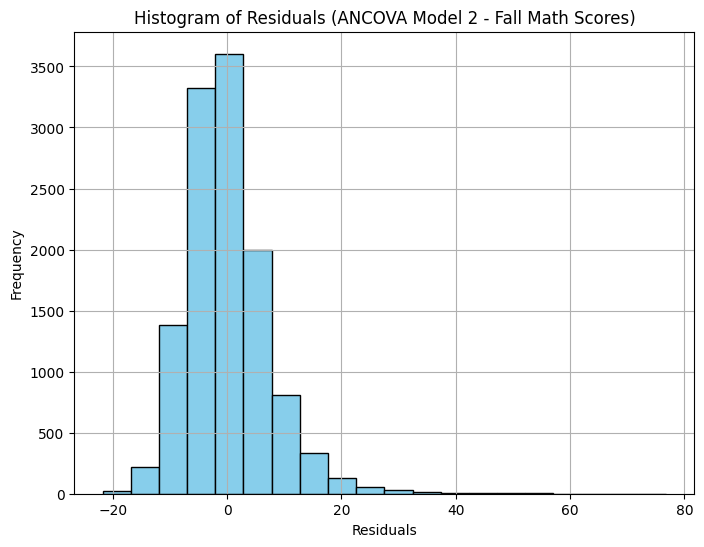

In [33]:
# Assumption 3 - Normality of Residuals
#ANCOVA Model

#Fall Reading Scores
model1 = ols('fallreadingscore ~ fallgeneralknowledgescore + incomegroup', data= df).fit()
model1_residuals = model1.resid

# Residual Histogram
plt.figure(figsize=(8, 6))
plt.hist(model1_residuals, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (ANCOVA Model 1 - Fall Reading Scores)')
plt.grid(True)
plt.show()


#Fall Maths Scores
model2 = ols('fallmathscore ~ fallgeneralknowledgescore + incomegroup', data= df).fit()
model2_residuals = model2.resid

# Residual Histogram
plt.figure(figsize=(8, 6))
plt.hist(model2_residuals, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (ANCOVA Model 2 - Fall Math Scores)')
plt.grid(True)
plt.show()


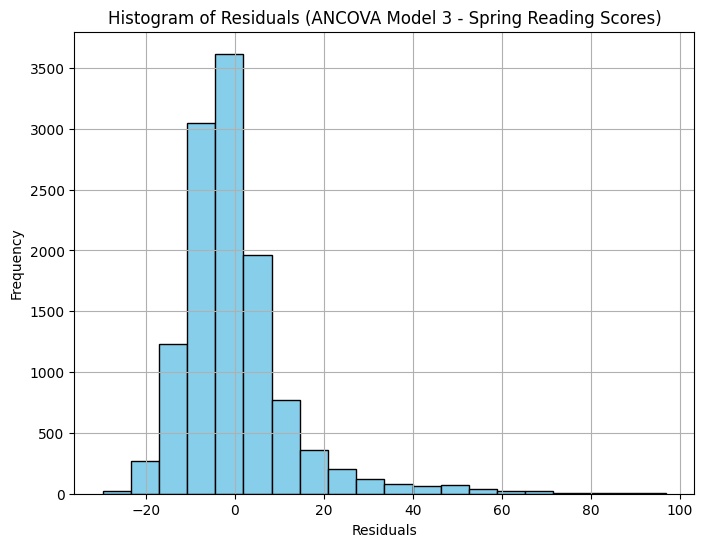

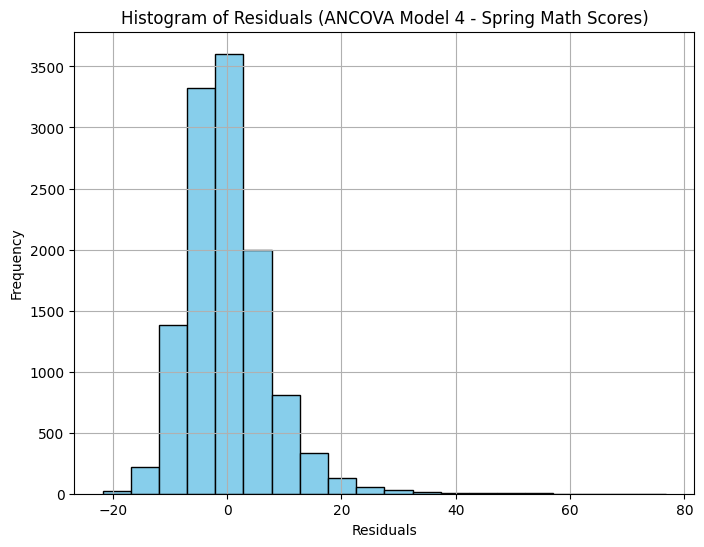

In [34]:
# Assumption 3 - Normality of Residuals
#ANCOVA Model

#Spring Reading Scores
model3 = ols('springreadingscore ~ springgeneralknowledgescore + incomegroup', data= df).fit()
model3_residuals = model3.resid

# Residual Histogram
plt.figure(figsize=(8, 6))
plt.hist(model3_residuals, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (ANCOVA Model 3 - Spring Reading Scores)')
plt.grid(True)
plt.show()


#Spring Maths Scores
model4 = ols('springmathscore ~ springgeneralknowledgescore + incomegroup', data= df).fit()
model4_residuals = model2.resid

# Residual Histogram
plt.figure(figsize=(8, 6))
plt.hist(model4_residuals, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (ANCOVA Model 4 - Spring Math Scores)')
plt.grid(True)
plt.show()


In [35]:
# Assumption 3 - Normality of Residuals
# Shapiro-Wilk Test

# ANCOVA Model 1 - Fall Reading Scores
print("ANCOVA Model 1 - Fall Reading Scores")
print(sm.shapiro(model1_residuals))
print()

#ANCOVA Model 2 - Fall Math Scores
print("ANCOVA Model 2 - Fall Math Scores")
print(sm.shapiro(model2_residuals))
print()

#ANCOVA Model 3 - Spring Reading Scores
print("ANCOVA Model 3 - Spring Reading Scores")
print(sm.shapiro(model3_residuals))
print()

#ANCOVA Model 4 - Spring Math Scores
print("ANCOVA Model 4 - Spring Math Scores")
print(sm.shapiro(model4_residuals))

ANCOVA Model 1 - Fall Reading Scores
ShapiroResult(statistic=0.7827902436256409, pvalue=0.0)

ANCOVA Model 2 - Fall Math Scores
ShapiroResult(statistic=0.936098575592041, pvalue=0.0)

ANCOVA Model 3 - Spring Reading Scores
ShapiroResult(statistic=0.8265702724456787, pvalue=0.0)

ANCOVA Model 4 - Spring Math Scores
ShapiroResult(statistic=0.936098575592041, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



**Assumption 4 - Homogeneity of Variances**

In [36]:
# Assumption 4 - Homogeneity of Variances
# Levene's Test
sm.levene(model1_residuals, model2_residuals, model3_residuals, model4_residuals)

LeveneResult(statistic=457.07528101817735, pvalue=8.014073079026357e-293)

## **ANCOVA Model**

- using Pingouin and Statsmodels

In [37]:
%pip install pingouin
from pingouin import ancova

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.7 MB/s eta 0:00:00


In [38]:
#Fall Reading Score
# Pingouin method
ancova(data=df, dv='fallreadingscore', covar='fallgeneralknowledgescore', between='incomegroup')


,Source,SS,DF,F,p-unc,np2
0,incomegroup,15987.076426,2,97.146849,1.411113e-42,0.016026
1,fallgeneralknowledgescore,225245.650280,1,2737.449236,0.000000e+00,0.186647
2,Residual,981554.407140,11929,NaN,NaN,NaN


In [39]:
#Fall Reading Score
# StatsModels method
fall_reading = ols('fallreadingscore ~ incomegroup + fallgeneralknowledgescore', data=df).fit()
print(fall_reading.summary())

                            OLS Regression Results                            
Dep. Variable:       fallreadingscore   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     1326.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:25:58   Log-Likelihood:                -43243.
No. Observations:               11933   AIC:                         8.649e+04
Df Residuals:                   11929   BIC:                         8.652e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [40]:
#Fall Math Score
#Pingouin method
ancova(data=df, dv='fallmathscore', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,11585.864980,2,111.928370,6.927877e-49,0.018420
1,fallgeneralknowledgescore,273412.600276,1,5282.752173,0.000000e+00,0.306927
2,Residual,617393.889005,11929,NaN,NaN,NaN


In [41]:
#Fall Math Score
# StatsModels method
fall_math = ols('fallmathscore ~ incomegroup + fallgeneralknowledgescore', data=df).fit()
print(fall_math.summary())

                            OLS Regression Results                            
Dep. Variable:          fallmathscore   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     2416.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:25:58   Log-Likelihood:                -40477.
No. Observations:               11933   AIC:                         8.096e+04
Df Residuals:                   11929   BIC:                         8.099e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [42]:
#Spring Reading Score
#Pingouin method
ancova(data=df, dv='springreadingscore', covar='springgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.866144e+04,2,58.532725,5.052222e-26,0.009718
1,springgeneralknowledgescore,4.000620e+05,1,2509.636510,0.000000e+00,0.173814
2,Residual,1.901606e+06,11929,NaN,NaN,NaN


In [43]:
#Spring Reading Score
# StatsModels method
spring_reading = ols('springreadingscore ~ incomegroup + springgeneralknowledgescore', data=df).fit()
print(spring_reading.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     1145.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:25:58   Log-Likelihood:                -47189.
No. Observations:               11933   AIC:                         9.439e+04
Df Residuals:                   11929   BIC:                         9.442e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [44]:
#Spring Math Score
#Pingouin Method
ancova(data=df, dv='springmathscore', covar='springgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.166991e+04,2,64.830308,9.919072e-29,0.010752
1,springgeneralknowledgescore,5.043363e+05,1,5603.516818,0.000000e+00,0.319607
2,Residual,1.073652e+06,11929,NaN,NaN,NaN


In [45]:
#Spring Math Score
# StatsModels method
spring_math = ols('springmathscore ~ incomegroup + springgeneralknowledgescore', data=df).fit()
print(spring_math.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     2417.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:25:59   Log-Likelihood:                -43779.
No. Observations:               11933   AIC:                         8.757e+04
Df Residuals:                   11929   BIC:                         8.759e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## **Post-Hoc Tests**
- Tukey's HSD

In [46]:
# Fall Reading Score
tukey_results_1 = pairwise_tukeyhsd(df['fallreadingscore'], df['incomegroup'])
print(tukey_results_1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   3.5057   0.0 2.9893 4.0221   True
     1      3   7.1117   0.0 6.5851 7.6383   True
     2      3    3.606   0.0 3.0501 4.1618   True
-------------------------------------------------


In [47]:
# Fall Math Score
tukey_results_2 = pairwise_tukeyhsd(df['fallmathscore'], df['incomegroup'])
print(tukey_results_2.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2    3.644   0.0 3.2003 4.0877   True
     1      3   7.0882   0.0 6.6358 7.5407   True
     2      3   3.4443   0.0 2.9667 3.9218   True
-------------------------------------------------


In [48]:
# Spring Reading Score
tukey_results_3 = pairwise_tukeyhsd(df['springreadingscore'], df['incomegroup'])
print(tukey_results_3.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   4.3444   0.0 3.6312 5.0576   True
     1      3   8.5418   0.0 7.8145 9.2691   True
     2      3   4.1974   0.0 3.4298 4.9651   True
-------------------------------------------------


In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Spring Math Score
tukey_results_4 = pairwise_tukeyhsd(df['springmathscore'], df['incomegroup'])
print(tukey_results_4.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   4.5816   0.0 3.9911 5.1722   True
     1      3   8.5288   0.0 7.9267  9.131   True
     2      3   3.9472   0.0 3.3116 4.5828   True
-------------------------------------------------
